# Home Mortgage Approval Data Visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.size"] = 14

In [3]:
df = pd.read_csv("./Data/actions_taken_1-2-3_state_TN.csv")
df['income'] = df['income'].multiply(1000)

/var/folders/8v/8twy7p3n3m535t9m_htmk0h00000gn/T/ipykernel_6042/3743522934.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Data/actions_taken_1-2-3_state_TN.csv")


In [4]:
needed_cols = ["loan_amount", "interest_rate", "income", "applicant_sex", "applicant_race-1", "applicant_ethnicity-1"]

modified_df = df[needed_cols]
modified_df = modified_df.dropna()
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215202 entries, 1 to 285691
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amount            215202 non-null  float64
 1   interest_rate          215202 non-null  object 
 2   income                 215202 non-null  float64
 3   applicant_sex          215202 non-null  int64  
 4   applicant_race-1       215202 non-null  float64
 5   applicant_ethnicity-1  215202 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 11.5+ MB


In [5]:
modified_df = modified_df[modified_df['interest_rate'] != "Exempt"]
modified_df['interest_rate'] = modified_df['interest_rate'].astype(float)
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204941 entries, 1 to 285691
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amount            204941 non-null  float64
 1   interest_rate          204941 non-null  float64
 2   income                 204941 non-null  float64
 3   applicant_sex          204941 non-null  int64  
 4   applicant_race-1       204941 non-null  float64
 5   applicant_ethnicity-1  204941 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 10.9 MB


In [6]:
male_count = modified_df['applicant_sex'].eq(1).sum()
female_count = modified_df['applicant_sex'].eq(2).sum()
white_count = modified_df['applicant_race-1'].eq(5).sum()
black_count = modified_df['applicant_race-1'].eq(3).sum()
hispanic_count = modified_df['applicant_ethnicity-1'].eq(1).sum()
nonhispanic_count = modified_df['applicant_ethnicity-1'].eq(2).sum()

male_income = round(np.array(modified_df[modified_df['applicant_sex'] == 1]['income']).mean(), 2)
female_income = round(np.array(modified_df[modified_df['applicant_sex'] == 2]['income']).mean(), 2)
white_income = round(np.array(modified_df[modified_df['applicant_race-1'] == 5]['income']).mean(), 2)
black_income = round(np.array(modified_df[modified_df['applicant_race-1'] == 3]['income']).mean(), 2)
hispanic_income = round(np.array(modified_df[modified_df['applicant_ethnicity-1'] == 1]['income']).mean(), 2)
nonhispanic_income = round(np.array(modified_df[modified_df['applicant_ethnicity-1'] == 2]['income']).mean(), 2)

male_loan_amount = round(np.array(modified_df[modified_df['applicant_sex'] == 1]['loan_amount']).mean(), 2)
female_loan_amount = round(np.array(modified_df[modified_df['applicant_sex'] == 2]['loan_amount']).mean(), 2)
white_loan_amount = round(np.array(modified_df[modified_df['applicant_race-1'] == 5]['loan_amount']).mean(), 2)
black_loan_amount = round(np.array(modified_df[modified_df['applicant_race-1'] == 3]['loan_amount']).mean(), 2)
hispanic_loan_amount = round(np.array(modified_df[modified_df['applicant_ethnicity-1'] == 1]['loan_amount']).mean(), 2)
nonhispanic_loan_amount = round(np.array(modified_df[modified_df['applicant_ethnicity-1'] == 2]['loan_amount']).mean(), 2)

male_interest_rate = round(np.array(modified_df[modified_df['applicant_sex'] == 1]['interest_rate']).mean(), 2)
female_interest_rate = round(np.array(modified_df[modified_df['applicant_sex'] == 2]['interest_rate']).mean(), 2)
white_interest_rate = round(np.array(modified_df[modified_df['applicant_race-1'] == 5]['interest_rate']).mean(), 2)
black_interest_rate = round(np.array(modified_df[modified_df['applicant_race-1'] == 3]['interest_rate']).mean(), 2)
hispanic_interest_rate = round(np.array(modified_df[modified_df['applicant_ethnicity-1'] == 1]['interest_rate']).mean(), 2)
nonhispanic_interest_rate = round(np.array(modified_df[modified_df['applicant_ethnicity-1'] == 2]['interest_rate']).mean(), 2)

cell_text = [["Male", male_count, male_income, male_loan_amount, male_interest_rate],
             ["Female", female_count, female_income, female_loan_amount, female_interest_rate],
             ["White", white_count, white_income, white_loan_amount, white_interest_rate],
             ["Black", black_count, black_income, black_loan_amount, black_interest_rate],
             ["Hispanic", hispanic_count, hispanic_income, hispanic_loan_amount, hispanic_interest_rate],
             ["Non Hispanic", nonhispanic_count, nonhispanic_income, nonhispanic_loan_amount, nonhispanic_interest_rate]]



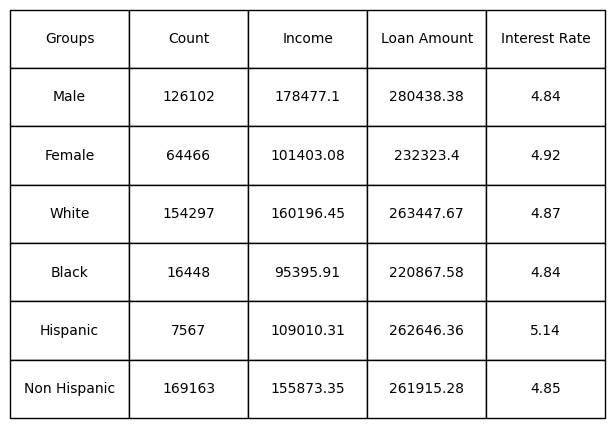

<Figure size 1000x600 with 0 Axes>

In [7]:
dataTable = plt.table(cellText=cell_text,
                      colLabels=["Groups", "Count", "Income", "Loan Amount", "Interest Rate"],
                      loc='center',
                      cellLoc='center')

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
plt.figure(figsize=(10, 6))
dataTable.scale(1.2, 3.5)

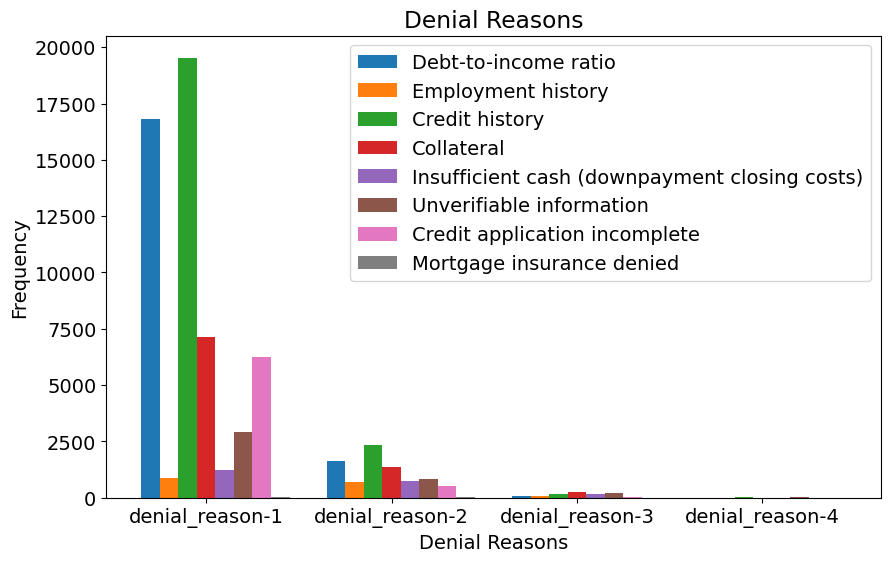

In [8]:
# Assuming `needed_cols` contains the column names denoting reasons
cols = ['denial_reason-1', 'denial_reason-2', 'denial_reason-3', 'denial_reason-4']
actual_reasons = ['Debt-to-income ratio', 'Employment history', 'Credit history', 'Collateral',
                  'Insufficient cash (downpayment closing costs)', 'Unverifiable information',
                  'Credit application incomplete', 'Mortgage insurance denied']

reason_counts = []

# Calculate counts for each reason across columns
for i in range(1, 9):  # Assuming reasons go from 1 to 8
    reason_i_counts = [df[col].eq(i).sum() for col in cols]
    reason_counts.append(reason_i_counts)

# Create a DataFrame with counts for each reason
reasons_df = pd.DataFrame(reason_counts, columns=cols)

x_axis = range(len(cols))

plt.figure(figsize=(10, 6))
bar_width = 0.1
for i in range(len(reason_counts)):
    plt.bar([x + i * bar_width for x in x_axis], reasons_df.iloc[i], bar_width, label=f"{actual_reasons[i]}")

plt.xticks([x + 3 * bar_width for x in x_axis], cols)
plt.xlabel("Denial Reasons")
plt.ylabel("Frequency")
plt.title("Denial Reasons")
plt.legend()
plt.show()

In [9]:
scatter_cols = ["income", "loan_amount", "action_taken"]
scatter_df = df[scatter_cols]
scatter_df = scatter_df.dropna()
scatter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273060 entries, 0 to 285691
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   income        273060 non-null  float64
 1   loan_amount   273060 non-null  float64
 2   action_taken  273060 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 8.3 MB


In [10]:
scatter_df['action_taken'] = scatter_df['action_taken'].replace([1,2,3], [1,1,0])

In [11]:
scatter_df.action_taken.value_counts()

action_taken
1    214830
0     58230
Name: count, dtype: int64

In [12]:
scatter_df.income.value_counts()

income
60000.0      3532
50000.0      2954
65000.0      2937
75000.0      2870
70000.0      2822
             ... 
3326000.0       1
6095000.0       1
1147000.0       1
2463000.0       1
1536000.0       1
Name: count, Length: 1907, dtype: int64

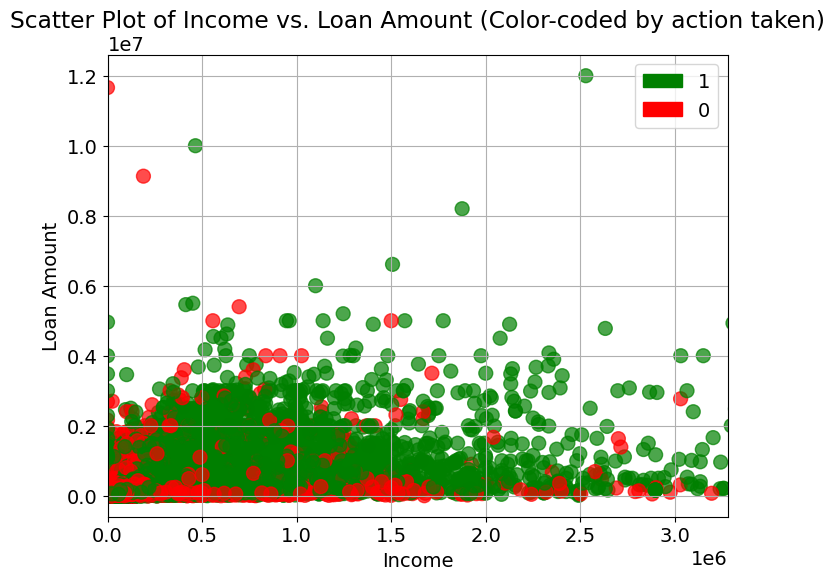

In [13]:
income = np.array(scatter_df["income"])
loan_amount = np.array(scatter_df["loan_amount"])
action_taken = np.array(scatter_df["action_taken"])

max_income_without_outlier = max(val for val in income if val < 3000000)

colors = {1: 'green', 0: 'red'}
approval_colors = [colors[status] for status in action_taken]

plt.figure(figsize=(8,6))
plt.scatter(income, loan_amount, c=approval_colors, s=100, alpha=0.7)
plt.xlim(0, max_income_without_outlier * 1.1)
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.title("Scatter Plot of Income vs. Loan Amount (Color-coded by action taken)")

import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=color, label=status) for status, color in colors.items()]
plt.legend(handles=legend_handles)

plt.grid(True)
plt.show()

In [14]:
needed_cols = ["action_taken", "applicant_sex", "applicant_race-1", "applicant_ethnicity-1"]
new_df = df[needed_cols]
new_df = new_df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285575 entries, 0 to 285691
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   action_taken           285575 non-null  int64  
 1   applicant_sex          285575 non-null  int64  
 2   applicant_race-1       285575 non-null  float64
 3   applicant_ethnicity-1  285575 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 10.9 MB


In [15]:
new_df['action_taken'] = new_df['action_taken'].replace([1,2,3], [1,1,0])

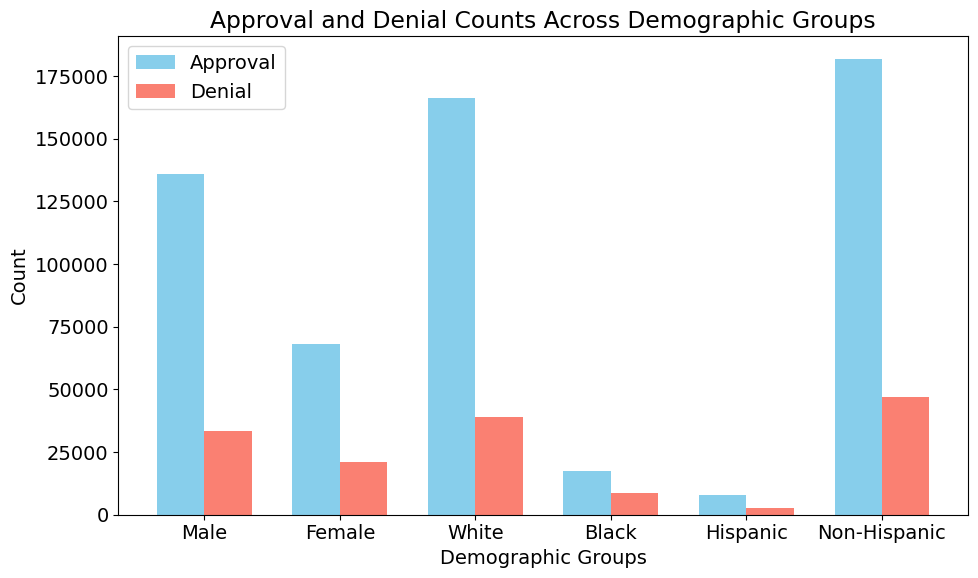

In [19]:
male_approval = len(new_df[(new_df['applicant_sex'] == 1) & (new_df['action_taken'] == 1)])
male_denial = len(new_df[(new_df['applicant_sex'] == 1) & (new_df['action_taken'] == 0)])

female_approval = len(new_df[(new_df['applicant_sex'] == 2) & (new_df['action_taken'] == 1)])
female_denial = len(new_df[(new_df['applicant_sex'] == 2) & (new_df['action_taken'] == 0)])

white_approval = len(new_df[(new_df['applicant_race-1'] == 5) & (new_df['action_taken'] == 1)])
white_denial = len(new_df[(new_df['applicant_race-1'] == 5) & (new_df['action_taken'] == 0)])

black_approval = len(new_df[(new_df['applicant_race-1'] == 3) & (new_df['action_taken'] == 1)])
black_denial = len(new_df[(new_df['applicant_race-1'] == 3) & (new_df['action_taken'] == 0)])

hispanic_approval = len(new_df[(new_df['applicant_ethnicity-1'] == 1) & (new_df['action_taken'] == 1)])
hispanic_denial = len(new_df[(new_df['applicant_ethnicity-1'] == 1) & (new_df['action_taken'] == 0)])

nonhispanic_approval = len(new_df[(new_df['applicant_ethnicity-1'] == 2) & (new_df['action_taken'] == 1)])
nonhispanic_denial = len(new_df[(new_df['applicant_ethnicity-1'] == 2) & (new_df['action_taken'] == 0)])

# Counts obtained from your calculations
approval_counts = [male_approval, female_approval, white_approval, black_approval, hispanic_approval, nonhispanic_approval]
denial_counts = [male_denial, female_denial, white_denial, black_denial, hispanic_denial, nonhispanic_denial]
demographic_groups = ['Male', 'Female', 'White', 'Black', 'Hispanic', 'Non-Hispanic']

# Setting up the bar plot
bar_width = 0.35
index = range(len(demographic_groups))

plt.figure(figsize=(10, 6))
plt.bar(index, approval_counts, bar_width, label='Approval', color='skyblue')
plt.bar([i + bar_width for i in index], denial_counts, bar_width, label='Denial', color='salmon')

plt.xlabel('Demographic Groups')
plt.ylabel('Count')
plt.title('Approval and Denial Counts Across Demographic Groups')
plt.xticks([i + bar_width / 2 for i in index], demographic_groups)
plt.legend()
plt.tight_layout()
plt.show()